The essence of machine learning and deep learning is to take some data from the past, build an algorithm (like a neural network) to discover patterns in it and use the discoverd patterns to predict the future.

There are many ways to do this and many new ways are being discovered all the time.

But let's start small.

How about we start with a straight line?

And we see if we can build a PyTorch model that learns the pattern of the straight line and matches it.

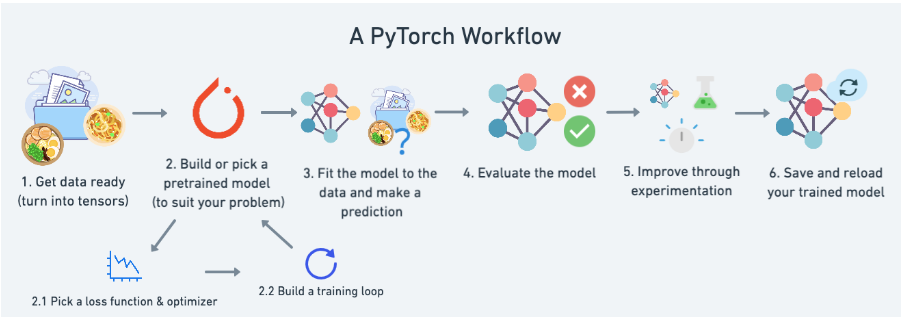

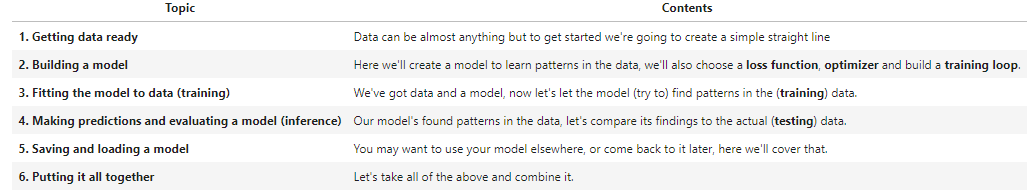

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks


# Check PyTorch version
# torch.__version__

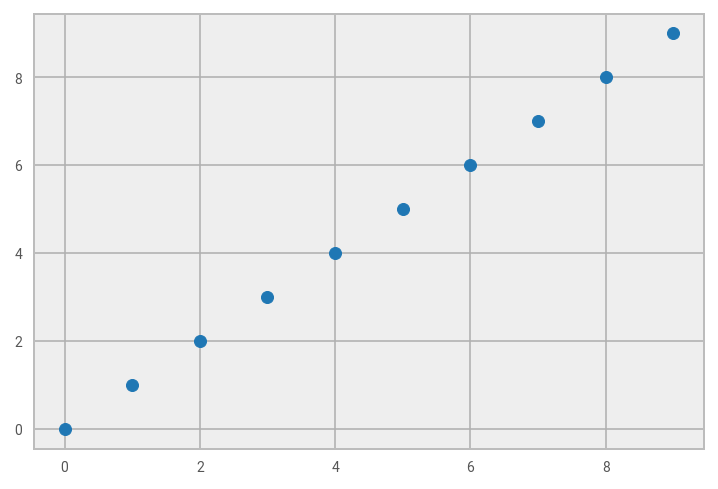

In [2]:
import random
import numpy as np
# x = torch.rand((1, 10, 1))
x = np.arange(10)
plt.scatter(x, x)

### 1. Get Data Ready

#### Creating dataset using Linear Regression:

In [3]:
#Step 1 : start with known parameters:

#we know linear regression formula is y=mx+c. m is the slope, c is the intercept

weight = 0.7
bias = 0.3


x = torch.arange(0,1,0.02).unsqueeze(dim=1)
print(x[:10],x.shape)

y = weight*x + bias
print(y[:10],y.shape)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) torch.Size([50, 1])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) torch.Size([50, 1])


We know the relationship between x and y as we created it. Consider, we do not know the relationship and find the relationship

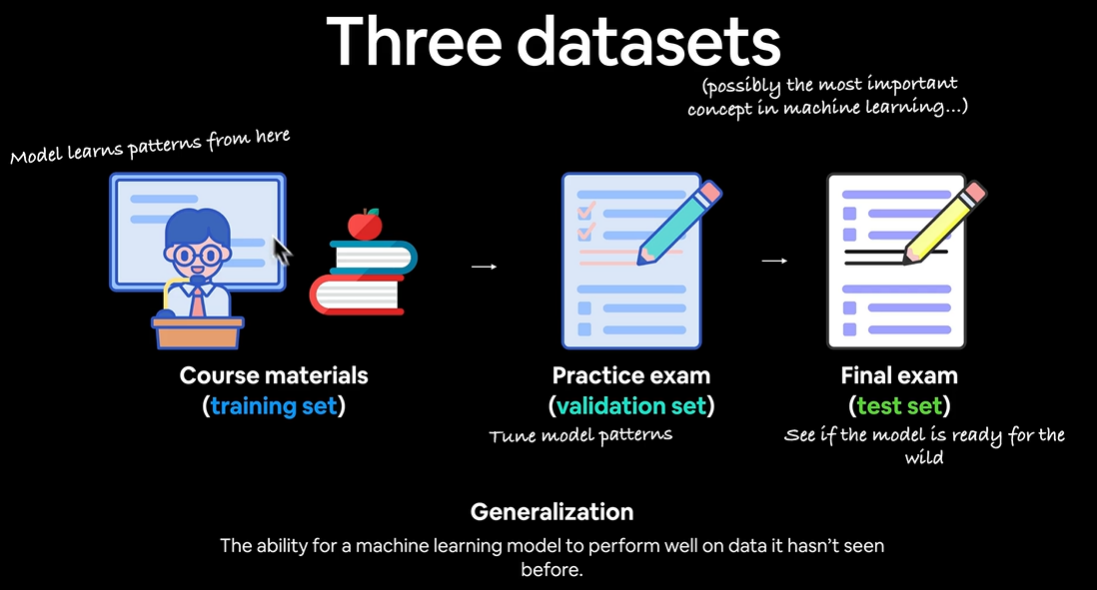

#### Spliting dataset into test and train

In [4]:
len(x), len(y)

(50, 50)

In [5]:
train_split = int(0.8 * len(x))
train_split

40

In [6]:
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train),len(y_train),len(x_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=None):
    
    plt.figure(figsize=(10, 7))

  # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size": 14})

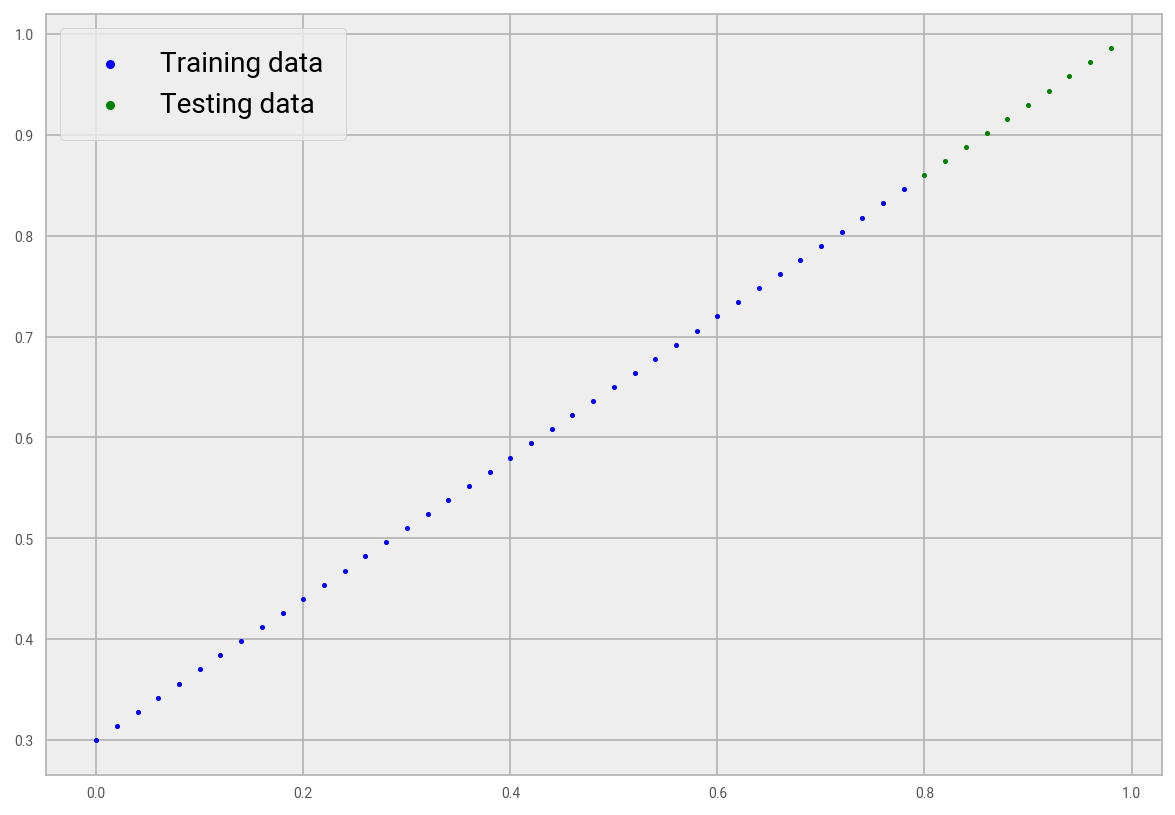

In [8]:
plot_predictions();

#### 2. Buiding a Model

#### CHEAT SHEET https://pytorch.org/tutorials/beginner/ptcheat.html





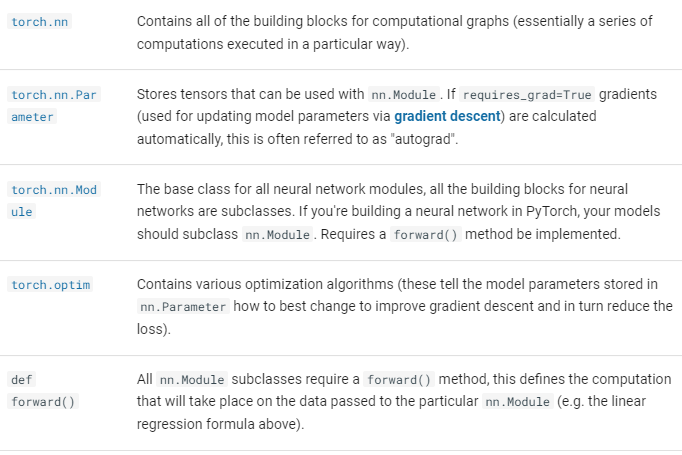

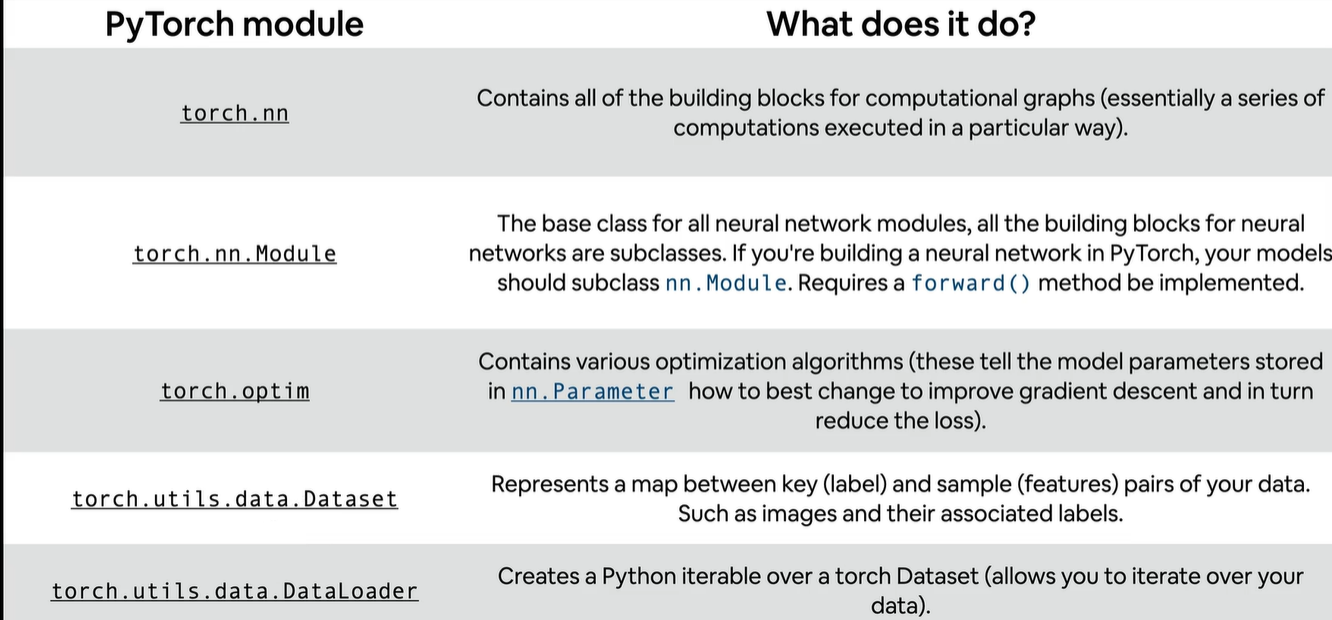

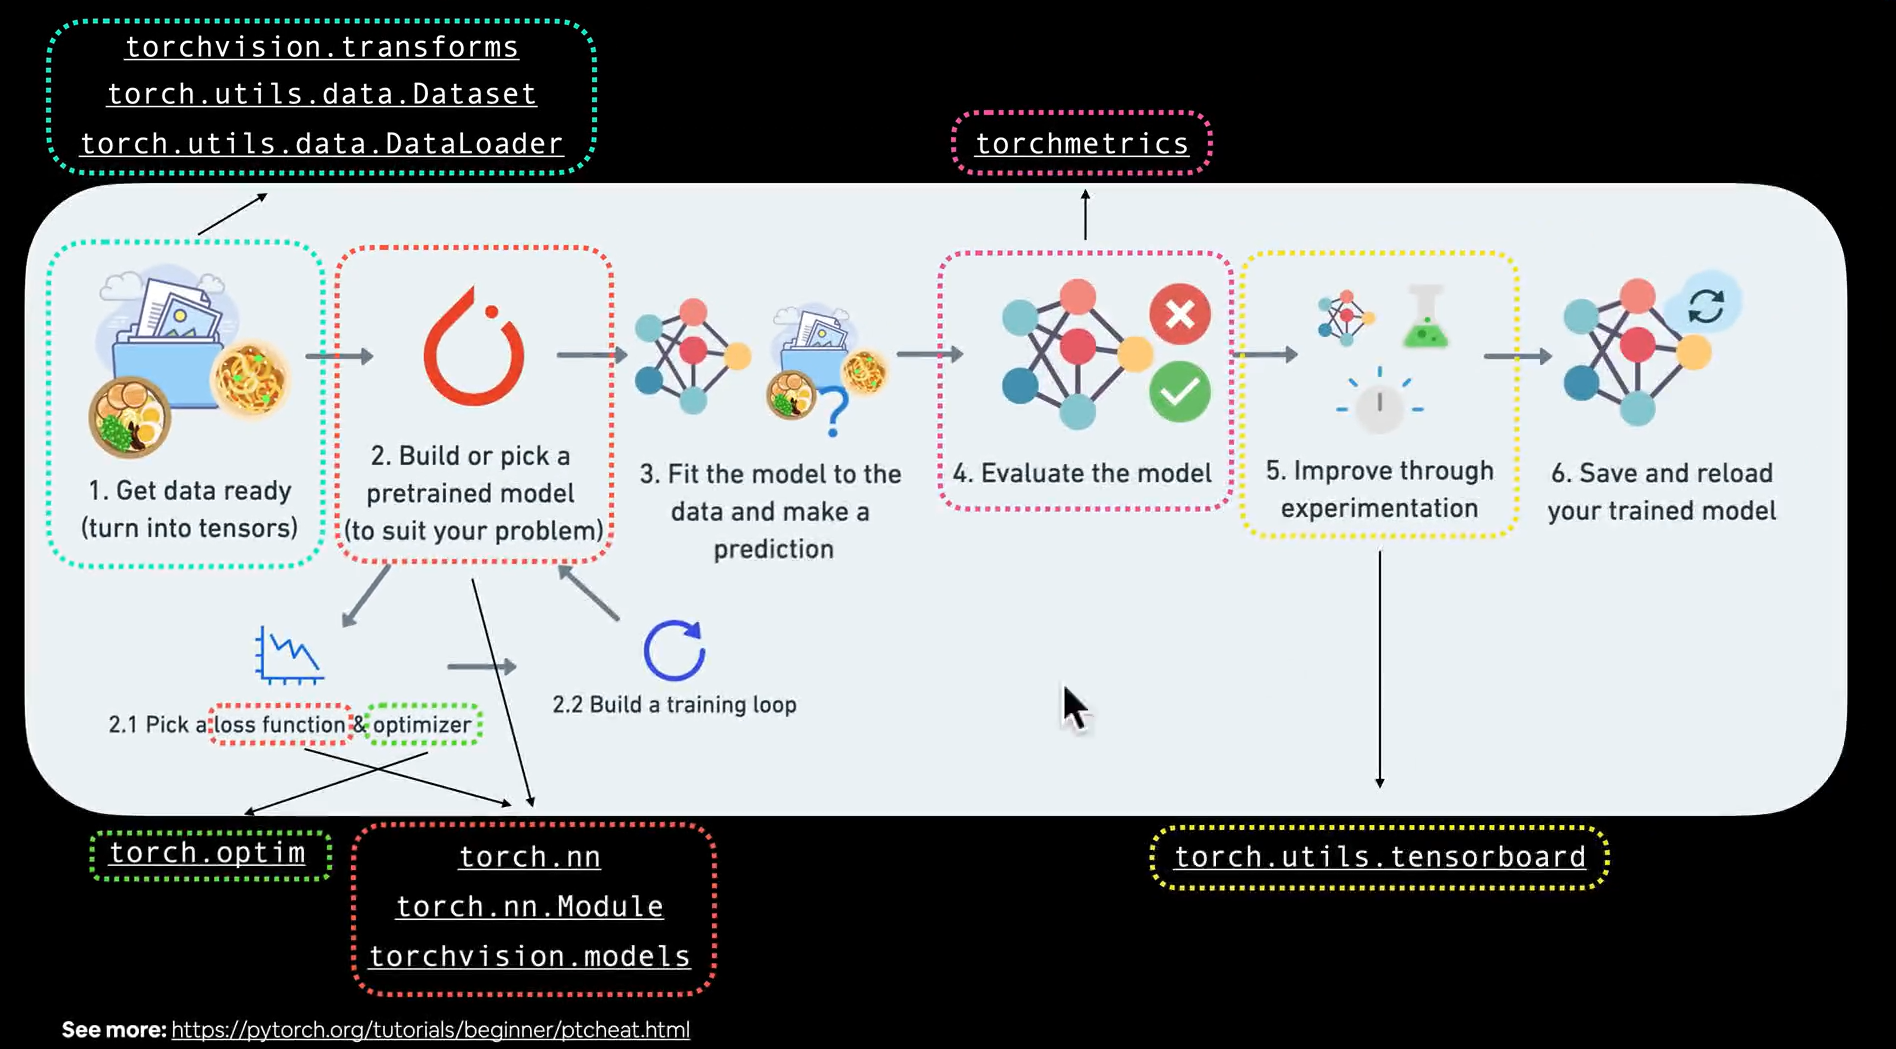

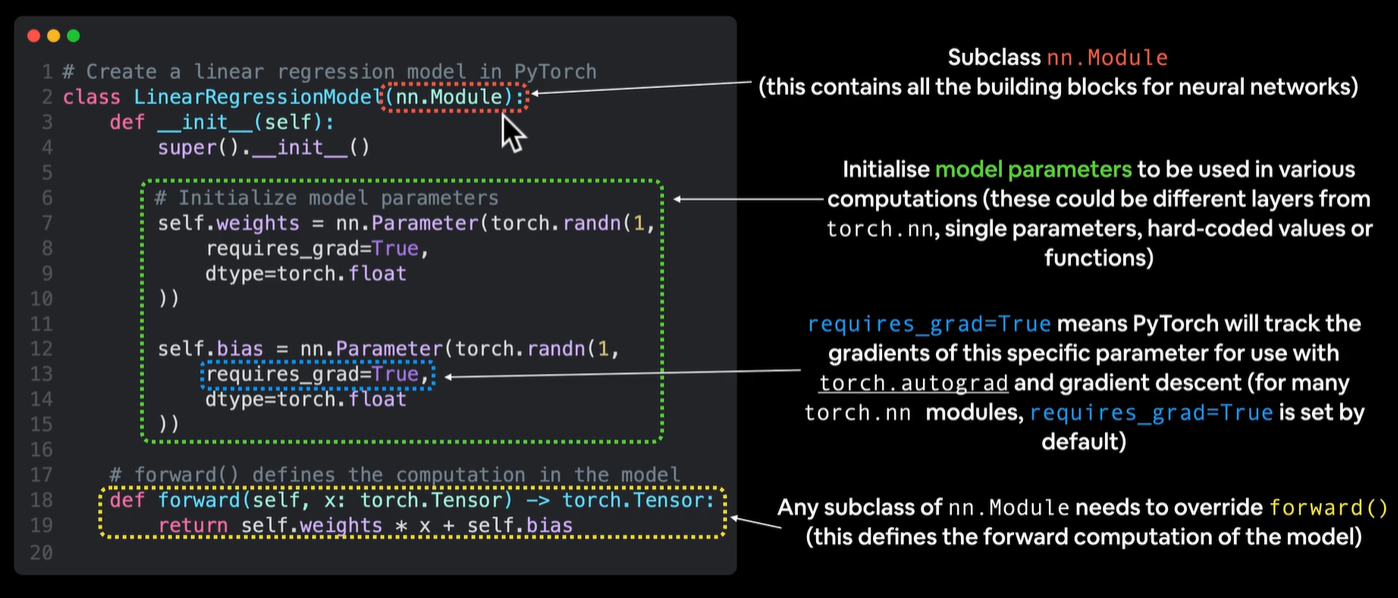

In [9]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

#### Leaning about .Parameters

In [10]:
#create a random seed

torch.manual_seed(42)

# creating instance of the model

model_0 = LinearRegressionModel()

list(model_0.parameters())


#from below we can see that the weight and bias are 0.3367 and bias is 0.1288. But we know our dataset we created using 
#weight = 0.7, bias = 0.3 so fundamental idea of deep learning is to make sure our models weight and bias are close to ideal bias and weights 
#this is done with help of backpropogation and gradient descent

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
#listing the named parameter. 

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

###### the weights in 13 are the randomly created weights and bias by model, whereas the weight and bias are the ones that we used to manually create the dataset. So the main goal here is, the model initially starts with the random weights and bias, and uses gradient descent and back propogation to move the randomly assigned weights and bias as close as weights and biases of [15] line

### Making prediction using `torch.inference_mode()`

* to check our models predictive power, lets see how well it predicts `y_test based on x_test
* when we pass data through model, its gonna run it through the forward() method 
* In places where torch.inference_mode() throws error we can replace with torch.no_grad()


In [13]:
x_test, y_test #an ideal model will take x_test values and return y_test values

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
#make prediction with model
import torch

with torch.no_grad():
    y_pred = model_0(x_test)
    
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

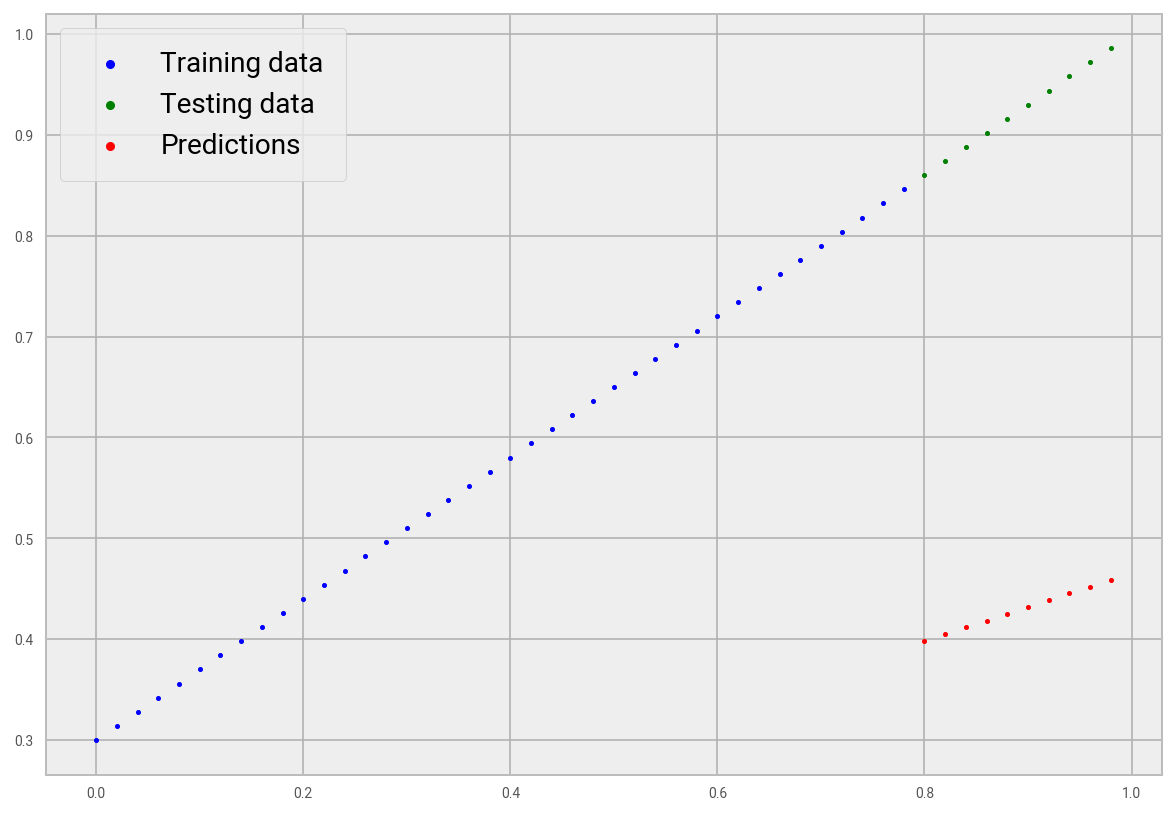

In [16]:
plot_predictions(predictions = y_pred)

"From the above we can see, the ypreds is far different from the ytest. This is because we started our model with random data."

### Training a model intuition

* whole idea of training is for a model to move from some unknown parameters or random pvalues or poor representation of data to better representation of data

* here we see we have poorly representation of data (red dots). 

* Things we need to train model :
    1. loss function -->  one way to measure model performance on how poor or how wrong our model predicts is using loss function
    
    2. Optimizer --> takes into account loss of the model and adjusts models parameter i.e weights & bias in our case to improve loss function
    
    3. training loop and testing loop

#### L1 Loss (or) Mean Absolute Error and Optimizer

##### Setting an loss function

* Is the mean absoulute error which is a difference between actual and predicted value. 

* Objective of training a model is to reduce the loss function so the predicted value is as close as to the ideal value

##### Setting an optimizer

* Optimizer and loss function works together. Optimizer provides the weight and bias for the reduction of loss function 

* params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before). In our case we adjust both weight and bias so we add modelname.parameters() as params

* lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). 

* The learning rate is considered a hyperparamter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).



****loss function and optimizer, the model's internal parameters (weights and bias) were updated to better reflect the underlying patterns in the data***

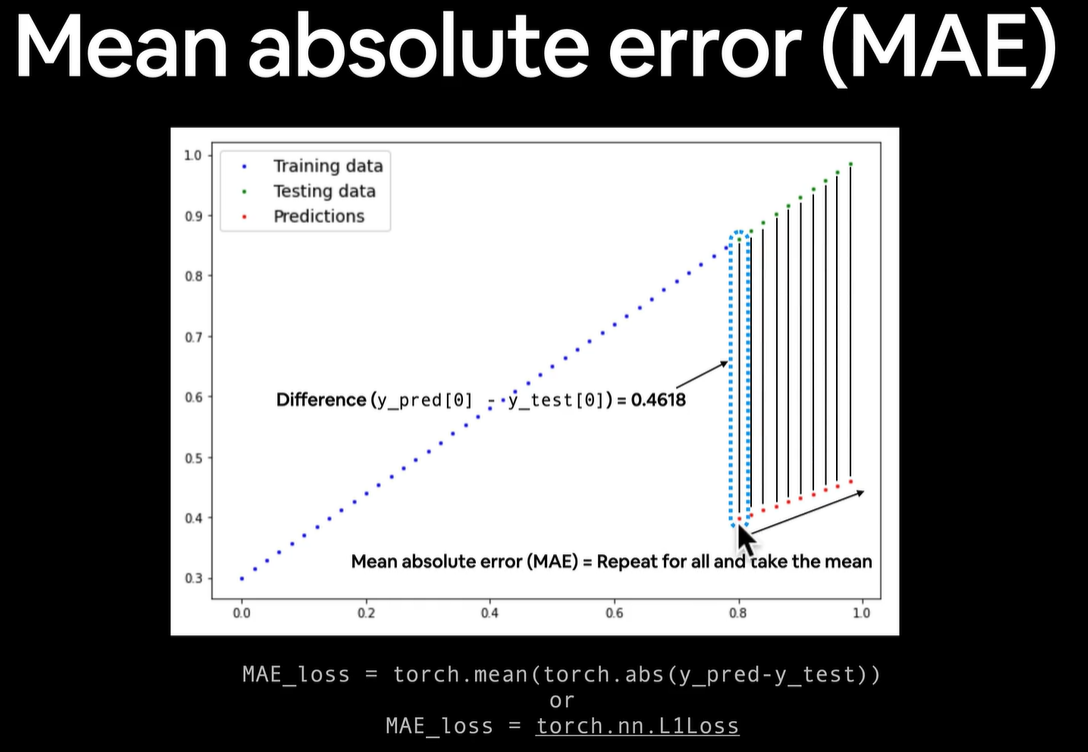

In [17]:
#set up loss function #how wrong the model is
loss_fn = nn.L1Loss()

In [18]:
#set up optimizer (Stochastic gradient descent - randomly adjusts weights, bias to the point where the loss reduces)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) #lr/ learning rate ;higher the learning rate, larger the change in the parameter
#smaller the learning rate; smaller the adjustment in the parameter

## Creating Training Loop and Testing Loop


Things needed in training loop:

0. Loop through the data
1. Forward pass to make prediction (This involves data moving through our model's `forward()` function or forward pass or **forward propogation**
2. Calculate the loss (compare forward pass predictions to groundtruth labels)
3. Optimizer zero grad
4. Loss Backward - move backwards through the network to calculate gradients of each of the parameters of our model with respect to loss (**backward propogration**)
5. Use optimizer to adjust our models parameeter to adjusts our models parameter to try and improve loss (**gradient descent**)

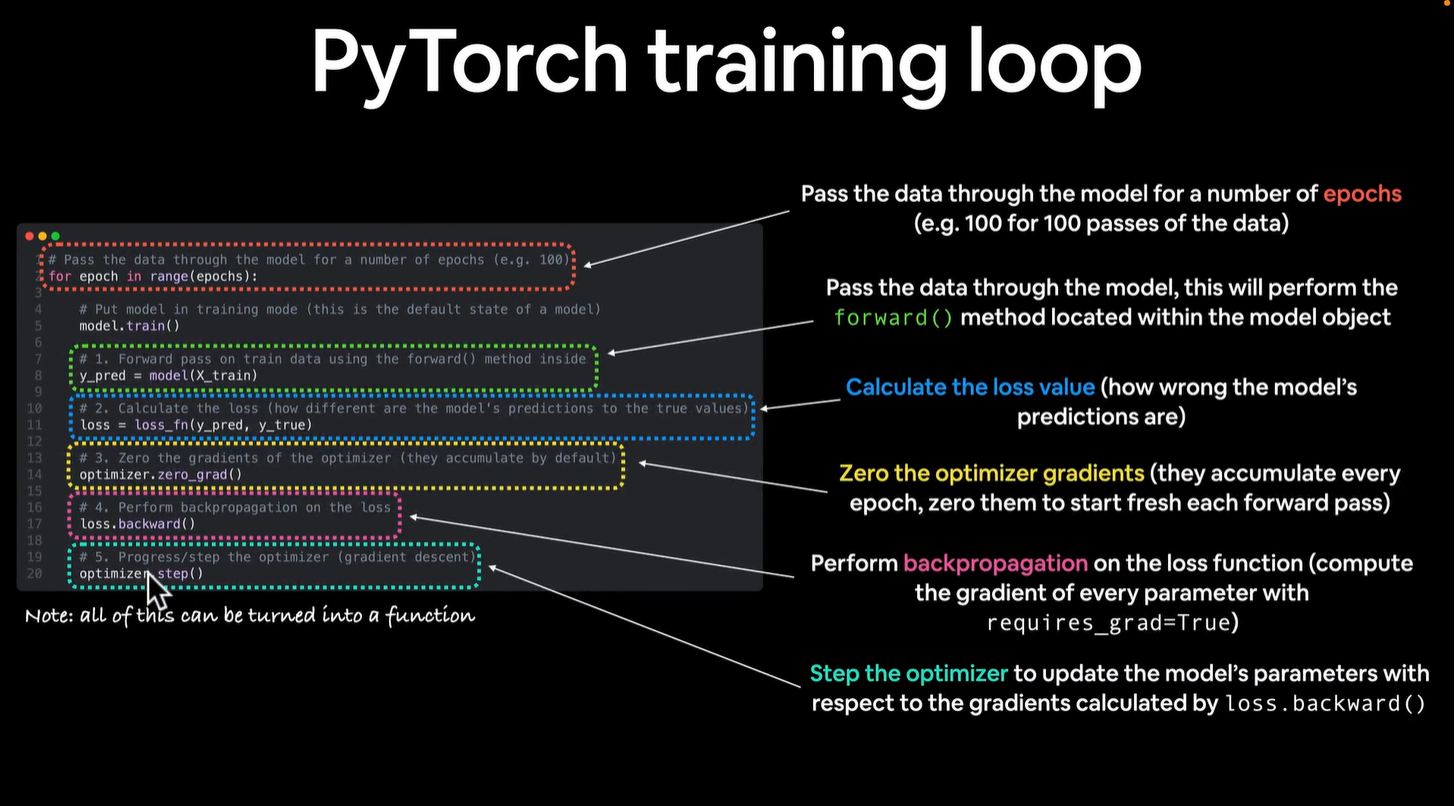


Things needed in testing loop:

0. turn off gradient tracking using with torch.no_grad()
1. Forward pass to make prediction (This involves data moving through our model's `forward()` function or forward pass or **forward propogation**
2. Calculate the loss (compare forward pass predictions to groundtruth labels)
3. Optimizer zero grad
4. Loss Backward - move backwards through the network to calculate gradients of each of the parameters of our model with respect to loss (**backward propogration**)
5. Use optimizer to adjust our models parameeter to adjusts our models parameter to try and improve loss (**gradient descent**)

In [19]:
torch.manual_seed(42)


#an epoch is one loop through the data.... (this is a hyperparameter as we set it ourself and not my model. if set by model it is called parameter, by us its hyperparameter)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

#step 0: loop thru data
for epoch in range(epochs):
    #set the model to training mode
    model_0.train()
    
    #step1 forward pass
    y_pred_new = model_0(x_train)
    
    #step2 calculate loss
    loss = loss_fn(y_pred_new,y_train) #input first, taget later. 
    #print(f"Loss:{loss}")
    
    #step3: optimizer zerograd
    optimizer.zero_grad()
    
    #step4: perform backpropogation on the above loss with respect to parameters
    loss.backward(retain_graph=True)
    
    #step5. set yp optimizer to perfrom gradient descent
    optimizer.step() #optimizer makes some calculation and stores it in step function, so we need to zero it in step 3 so it doesnt keep adding ntimes 
    
    #Testing code
    model_0.eval() #turns off differnt settings in model not needed for evealuating /test. When training then use code model_0.train, when starting testing code use model_0.eval
    
    with torch.no_grad():#turns of gradient tracking
        
        #1.do forward pass
        test_pred = model_0(x_test)
        
        #2.calculate the loss
        test_loss = loss_fn(test_pred,y_test)
    
    #print the status for every 10 epoch
    
    if epoch % 10 ==0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch} | Loss: {loss} | Test loss : {test_loss}")
        
        #print out model state_dict()
        print(model_0.state_dict())
        
    
        

Epoch:0 | Loss: 0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss: 0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss: 0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Loss: 0.053148526698350906 | Test loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Loss: 0.04543796554207802 | Test loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Loss: 0.04167863354086876 | Test loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Loss: 0.03818932920694351 | Test loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [20]:
print(f"weight:{weight}, Bias: {bias}")

weight:0.7, Bias: 0.3


### Loss goes down for each epoch and the weights and bias also moves towards the ideal value

In [21]:
#make prediction with new trained model
import torch

with torch.no_grad():
    y_pred_new = model_0(x_test)
    
y_pred_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

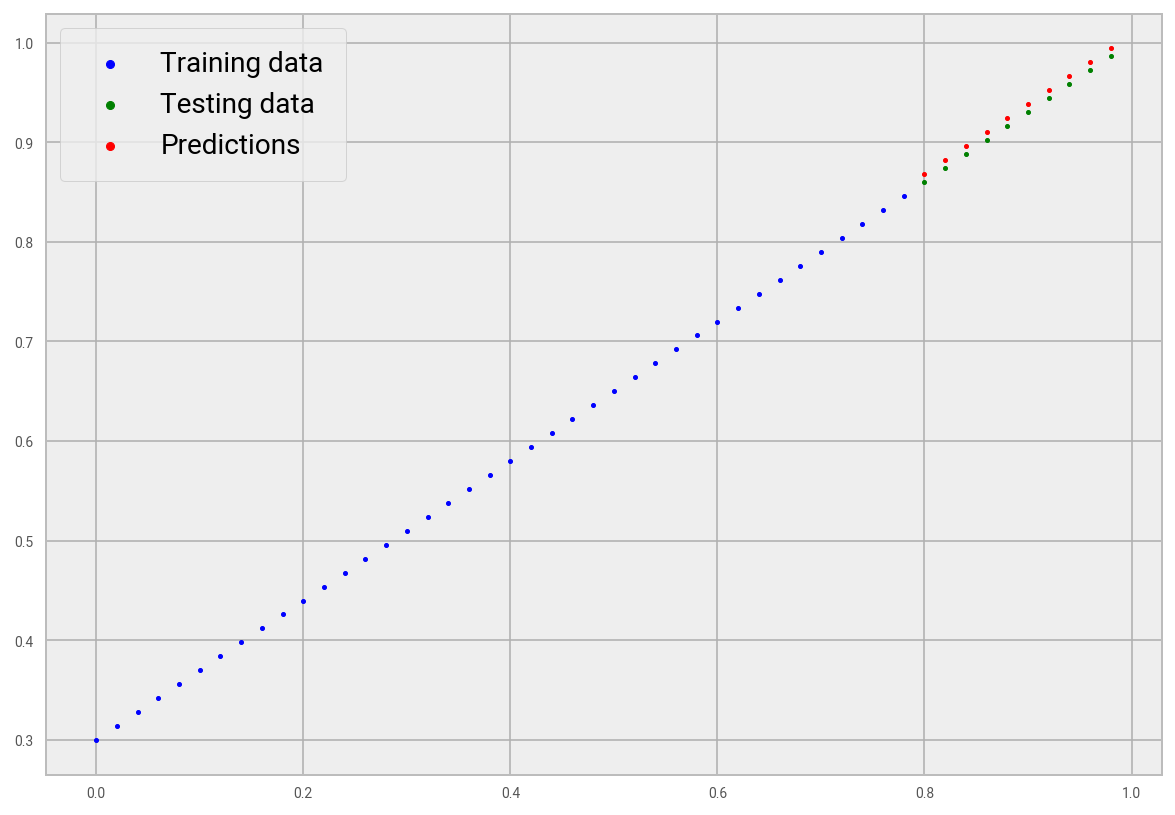

In [22]:
plot_predictions(predictions = y_pred_new)

##### From the plot above we can understand that with the models getting trained with more epochs, model updates parameter with power of backpropogation and gradient descent so the loss function reduces and the model learns parameter that are close to the ideal parameter and make better prediction close to ideal values

##### With 1000 epochs , model learns the ideal weights and bias perfectly and the y test is close to y pred. 

##### Less number of epoch and learning rate less model  

(0r)

##### More epoch and less learning rate 

#### plot loss curves

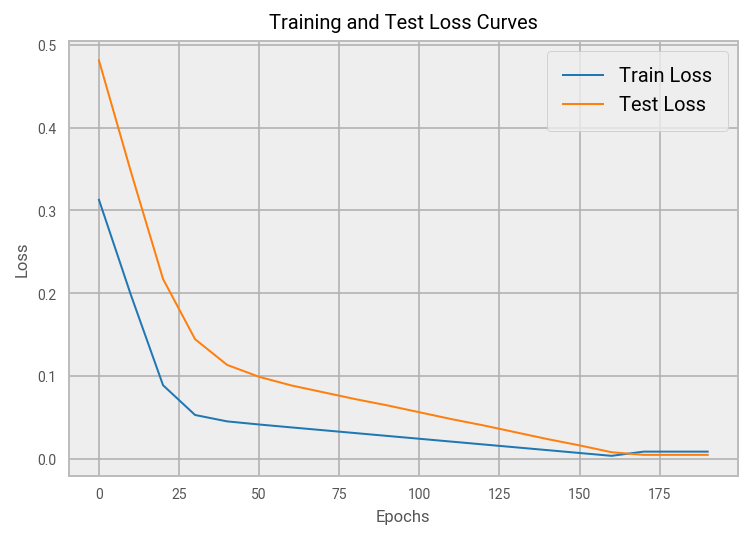

In [23]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = 'Test Loss')
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

#### Saving a Pytorch model's state_dict()

* torch.save() --> allows you to save a PyTorch object in python's pickle format
* torch.load() --> allows you to load the saved PyTorch object
* torch.nn.Module.load_state_dict() --> this allows to load a model's sabed state dictionary

In [24]:
from pathlib import Path #python module to deal with saving

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True) #model_path.make directory (parents directory created. )

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [25]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 cdsw cdsw 1153 Dec  5 05:03 models/01_pytorch_workflow_model_0.pth


#### Loading a saved PyTorch model's state_dict()

* Since we saved our model's state_dict() rather than loading the entire model , we will create a new instance of our models class and load the saved state_dict() into that

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# To load in a saved state_dict we have to instatntiate a new instance of our model class

loaded_model_0 = LinearRegressionModel() #create new instance of our model class

#show the state_dict of new loaded model_0

loaded_model_0.state_dict() #without calling our state_dict into it, the model will show the random dict. 

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [28]:
#NOW LOADING THE SAVED STATE DICT OF THE MODEL_0 INTO THE NEW LOADED MODEL

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
#Make some predictions with our loaded model with saved state dict

loaded_model_0.eval() #loading the tested mode

with torch.no_grad():
    loaded_model_preds = loaded_model_0(x_test)
    
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [30]:
#compare the loaded model preds with model_0 model preds

y_pred_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## EXERCISE

##### 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [31]:
#Setting up weight and bias

weight = 0.3
bias = 0.9

#setting up datapoints

x = torch.arange(0,1,0.02)

y = torch.arange(0,1,0.02)

print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: torch.Size([50]), y shape: torch.Size([50])


In [32]:
#splitting the data into train and test

train_split = int(0.8* len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [33]:
#plotting test and train data 


def plot_predictions(train_data = x_train, 
                    test_data = x_test,
                     train_labels = y_train,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10,7))
    
    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


          
      # Show the legend
    plt.legend(prop={"size": 14})

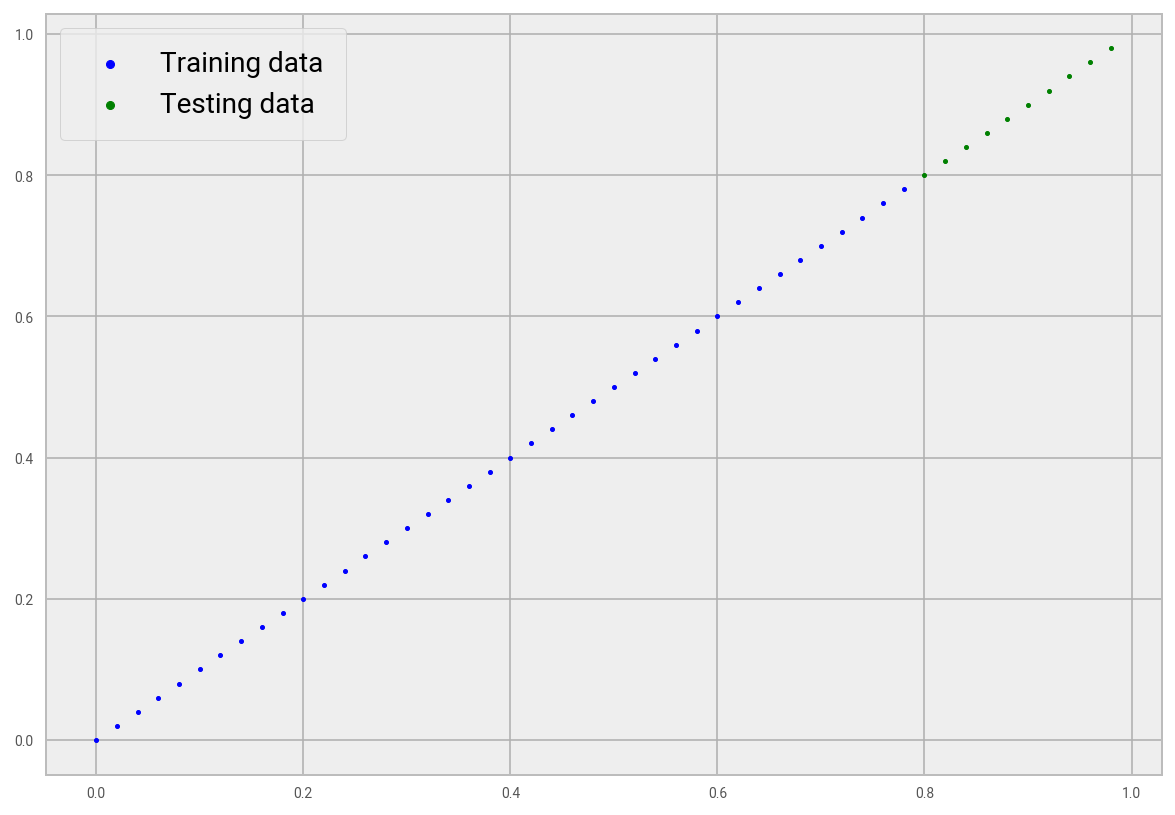

In [34]:
plot_predictions();

###### 2. Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [35]:
#creating a linear regression model and setting up parameter

class LinearRegressionModel (nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                        requires_grad = True,
                                               ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

In [36]:
#making a instance of it and checking its state_dict()

torch.manual_seed(42)

model_1 = LinearRegressionModel()

model_1.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [37]:
print(f"weight: {weight}, bias: {bias}")

weight: 0.3, bias: 0.9


As we randomly started we can see that the value model predicted and the ideal values are far from each other. We train the model in further code to get as close as the ideal value

###### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [38]:
#setting up the loss:

loss_fn = nn.L1Loss()

#setting up optimizer with learning rate 0.01

optimizer = torch.optim.SGD(params = model_1.parameters(), lr =0.03)

In [39]:
torch.manual_seed(42)

epochs = 150

epoch_count =[]
loss_values = []
test_loss_values =[]

#looping through dataset:

for epoch in range(epochs):
    #setting up model to training mode
    model_1.train()
    
    #forward pass
    y_pred_new = model_1(x_train)
    
    #calculate loss
    
    loss = loss_fn (y_pred_new, y_train)
    print(f"Loss:{loss}")
    
    #setting up optimizer zerograd
    
    optimizer.zero_grad()
    
    #performing backward propogartion to negotiate loss
    
    loss.backward(retain_graph = True)
    
    #setting up gradient descent
    
    optimizer.step()
    
    #setting up testing mode
    
    model_1.eval()
    
    with torch.no_grad():
        
        #do the forward pass to predict the value on the test data
        test_pred = model_1(x_test)
        
        #calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 20 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch}, Loss:{loss},Test Loss : {test_loss}")
        
        print(model_1.state_dict())

Loss:0.16443711519241333
Epoch:0, Loss:0.16443711519241333,Test Loss : 0.4373246729373932
OrderedDict([('weights', tensor([0.3470])), ('bias', tensor([0.1438]))])
Loss:0.15403515100479126
Loss:0.14615747332572937
Loss:0.13963718712329865
Loss:0.13427188992500305
Loss:0.12996014952659607
Loss:0.12604673206806183
Loss:0.12287984043359756
Loss:0.12026935815811157
Loss:0.11798836290836334
Loss:0.11602629721164703
Loss:0.11451246589422226
Loss:0.11299862712621689
Loss:0.11152992397546768
Loss:0.11032991111278534
Loss:0.10912992060184479
Loss:0.10792992264032364
Loss:0.1067299097776413
Loss:0.10561738163232803
Loss:0.10457038879394531
Loss:0.103523388504982
Epoch:20, Loss:0.103523388504982,Test Loss : 0.24688072502613068
OrderedDict([('weights', tensor([0.4886])), ('bias', tensor([0.2083]))])
Loss:0.10247639566659927
Loss:0.10142938792705536
Loss:0.10038238763809204
Loss:0.09933538734912872
Loss:0.098288394510746
Loss:0.09724138677120209
Loss:0.09619440138339996
Loss:0.09514738619327545
Loss

##### 4. Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [40]:
#make prediction with new trained model
#after 300 epochs lets see how good our model predicts
#create a random seed
import torch

with torch.no_grad():
    y_pred_new = model_1(x_test)
    
y_pred_new

tensor([0.7861, 0.8058, 0.8255, 0.8452, 0.8649, 0.8846, 0.9043, 0.9240, 0.9437,
        0.9634])

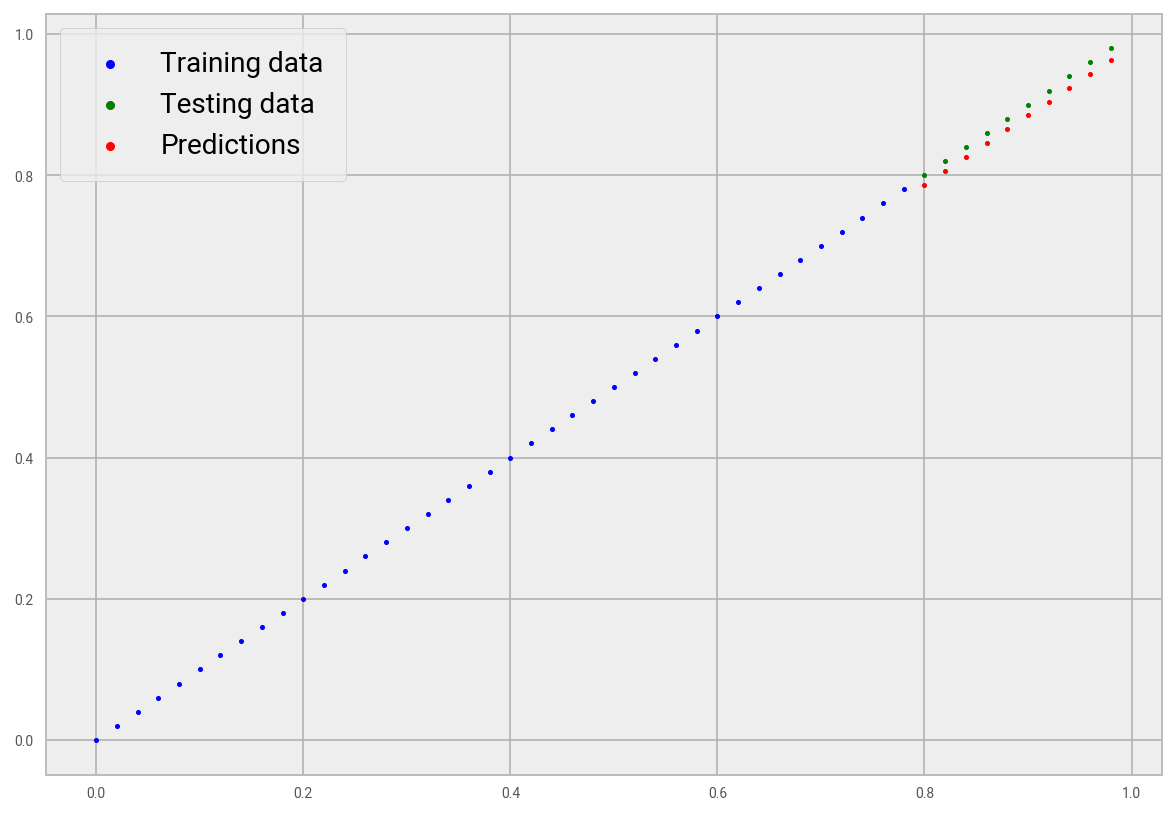

In [41]:
plot_predictions(predictions = y_pred_new)

In [42]:
#Plotting loss curves

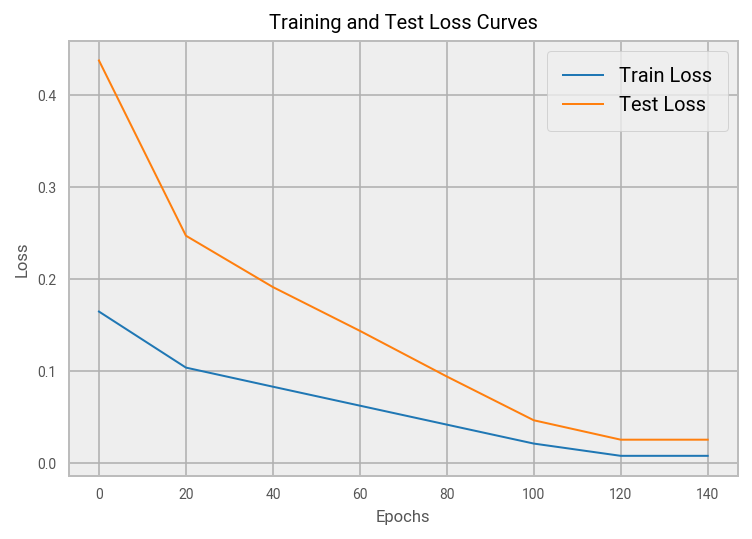

In [43]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = 'Test Loss')
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

###### 5. Save your trained model's state_dict() to file.
Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.